In [1]:
import src.generation.gamma as ga
import src.generation.multivariate_normal as mn

from src.salp.salp import SALP
from src.salp.salp import Node

import numpy as np
import matplotlib.pyplot as plt

## Example pipeline

Estimated minimal node power 30.0
Actual mean node load 31.110229260905488
-----------------------
Node 0: 0.7362199256754104


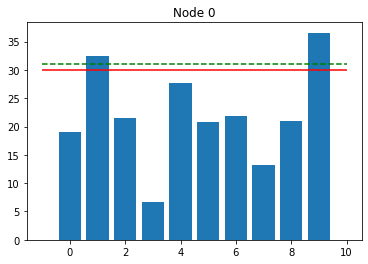

Node 1: 1.0776130079120791


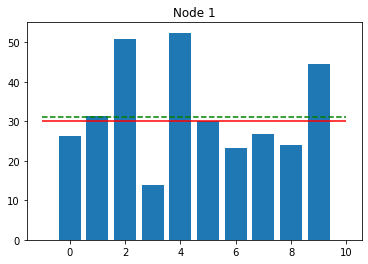

Node 2: 1.195123025465594


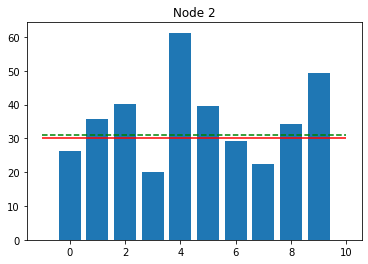

Node 3: 1.1390746090676482


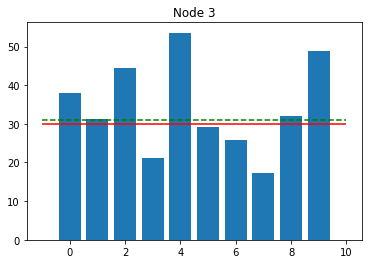

In [2]:
def pipeline(F: int, N: int, size: int, cor: float, rng = (2,4)):
    
    generator = ga.Generator(F, size, cor, rng)
    
    estimated_load = generator.get_estimated_cloud_load()
    estimated_minimal_node_power = estimated_load/size/N
    print("Estimated minimal node power", estimated_minimal_node_power)
    
    load_vectors = generator.generate_cloud_load_vectors()
    actual_mean_node_load = np.sum(load_vectors)/size/N
    print("Actual mean node load", actual_mean_node_load)
    
    cloud = SALP(N, load_vectors, False)
    assert len(cloud.nodes) == N
    
    print('-----------------------')
    
    for n in cloud.nodes:
        print("Node {}:".format(n.identity), np.mean(n.ws)/estimated_minimal_node_power)
        plt.bar(
            np.arange(size),
            n.ws
        )
        plt.title("Node {}".format(n.identity))
        plt.hlines(estimated_minimal_node_power, xmin=0-1, xmax=size, colors='r')
        plt.hlines(actual_mean_node_load, xmin=0-1, xmax=size, colors='g', linestyle='dashed')
        plt.show()
    
    
pipeline(20, 4, 10, 0.5)

# Parametry dla iteracji
* F - ilość shardów
* N - ilość węzłów
* cor - poziom korelacji miedzy wektorami obciążenia
* ro - poziom obciążenia chmury
* size - długość wektorów obciążenia
* parametry generatora do ustalenia